In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import spectral as sp

In [2]:
target = np.load(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\Savitzky-Golay-NPY\Lithogenic_CCA_04_2021-06-25_13-04-43_reflectance_S-G.npy", )
target.dtype

dtype('float32')

ImageView object:
  Display bands       :  (230, 110, 66)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.3071826696395874]
    G: [0.0, 0.7248304486274719]
    B: [0.0, 0.6663857102394104]

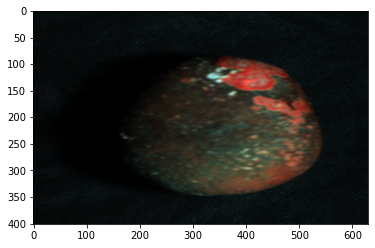

In [3]:
sp.imshow(target,(230,110,66))

**Spectral python tutorial**

In [6]:
pc = sp.principal_components(target)

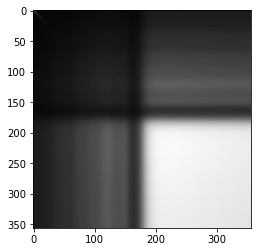

In [83]:
v = sp.imshow(pc.cov)

In [8]:
pc_0999 = pc.reduce(fraction=0.999) # 0.999 = 35, 0.998 = 22

In [9]:
len(pc_0999.eigenvalues)

35

In [10]:
target_pc = pc_0999.transform(target)

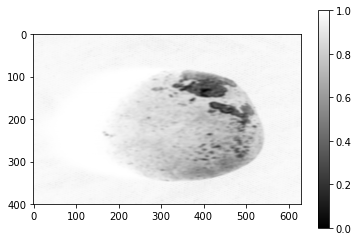

In [51]:
sp.imshow(target_pc[:,:,0])
plt.colorbar()

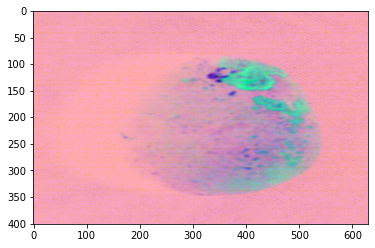

In [101]:
v = sp.imshow(target_pc[:,:,:3], stretch_all=True)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-15.665311489965523, 1.6676526611688616]
    G: [-15.665311489965523, 1.6676526611688616]
    B: [-15.665311489965523, 1.6676526611688616]

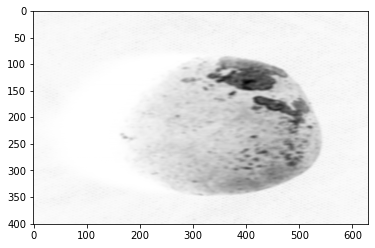

In [64]:
sp.imshow(target_pc[:,:,0])

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-4.90866260933329, 2.88330171474623]
    G: [-4.90866260933329, 2.88330171474623]
    B: [-4.90866260933329, 2.88330171474623]

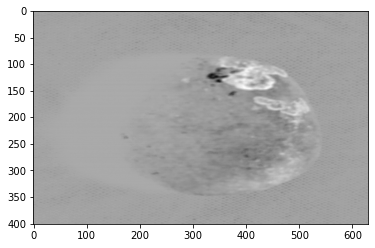

In [65]:
sp.imshow(target_pc[:,:,1])

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.2611271018446313, 0.23323878929024128]
    G: [-0.2611271018446313, 0.23323878929024128]
    B: [-0.2611271018446313, 0.23323878929024128]

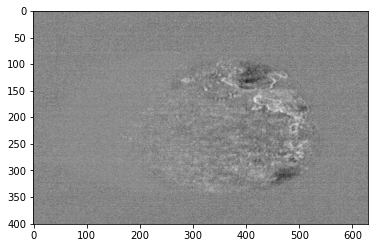

In [101]:
sp.imshow(target_pc[:,:,20])

**Tutorial 02**
- https://towardsdatascience.com/pca-on-hyperspectral-data-99c9c5178385

In [11]:
target.shape

(401, 630, 356)

In [12]:
X = target.reshape(target.shape[0]*target.shape[1], -1)
print(X.shape)

(252630, 356)


In [13]:
covariance_matrix=np.cov(X.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [21]:
ind=np.arange(0,len(eigen_values),1)
ind=[x for _,x in sorted(zip(eigen_values,ind))]
ind=ind[::-1]
eigen_values1=eigen_values[ind]
eigen_vectors1=eigen_vectors[:,ind]

In [22]:
eigen_vectors1=eigen_vectors1[:,:3]

Text(0.5, 0.92, 'simple 3D scatter plot')

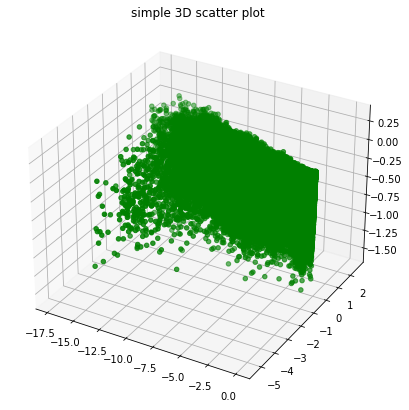

In [23]:
y=(eigen_vectors1.T).dot(X.T) 
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(y[0,:], y[1,:], y[2,:], color = "green")
plt.title("simple 3D scatter plot")

In [24]:
projection_matrix = (eigen_vectors.T[:][:3]).T
print(projection_matrix)

[[-0.0097185  -0.04438157 -0.82563953]
 [-0.00920572 -0.04053906 -0.47295619]
 [-0.00883056 -0.03941855 -0.23519592]
 ...
 [-0.07162982  0.03687929 -0.00602199]
 [-0.0716696   0.03712697 -0.00623788]
 [-0.07174494  0.03731666 -0.00661869]]


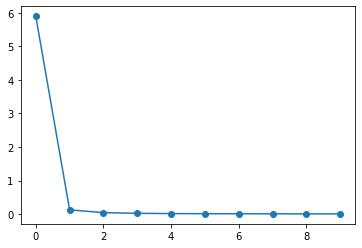

In [25]:
eigen_values1=eigen_values1[:10]
x=np.arange(0,len(eigen_values1),1)
plt.plot(x,eigen_values1,marker = 'o')
plt.show()